In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/pd_speech_features.csv')
dataset.head(21)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.82770,1.17300,0.265120,0.083127,...,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.89080,1.02210,0.220040,0.127410,...,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.69750,0.84951,0.157560,0.116890,...,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.69610,0.83405,0.172950,0.147370,...,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


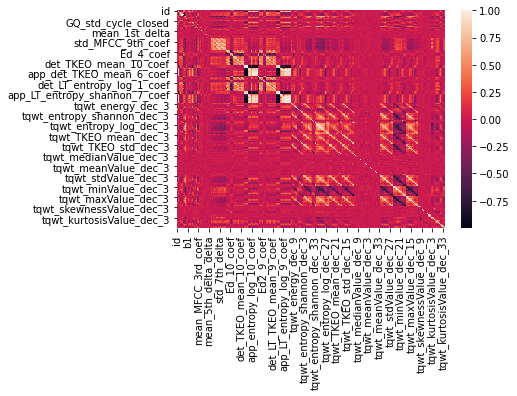

In [ ]:
dataset.info()
sns.heatmap(dataset.corr())

In [ ]:

predictors = dataset.drop(['class'], axis = 1) 
criterion = dataset["class"]
predictors.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_33,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,-0.173620,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.684220,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,-0.060885,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,-0.367170,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,1

In [ ]:
threshold = 0.8

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

high_cor_function(predictors)


max corr: 0.9999999925967988 , min corr:  -0.9993488115133633


ddaShimmer                     apq3Shimmer                      1.000000
app_LT_entropy_log_9_coef      app_LT_entropy_log_8_coef        1.000000
app_LT_entropy_shannon_9_coef  app_LT_entropy_shannon_8_coef    1.000000
app_entropy_log_9_coef         app_entropy_log_8_coef           1.000000
app_LT_entropy_log_10_coef     app_LT_entropy_log_9_coef        1.000000
                                                                  ...   
tqwt_TKEO_std_dec_16           tqwt_TKEO_std_dec_17             0.800752
det_TKEO_mean_9_coef           det_TKEO_std_10_coef             0.800719
Ed2_1_coef                     det_TKEO_std_2_coef              0.800380
app_TKEO_std_1_coef            app_TKEO_std_4_coef              0.800199
app_LT_TKEO_mean_2_coef        app_LT_TKEO_std_9_coef           0.800090
Length: 2446, dtype: float64

In [ ]:
dataset.shape
dataset.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.3

In [ ]:
x = dataset.drop('class', axis=1)
y = dataset['class']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

correlated_features = set()
correlation_matrix = dataset.corr()

threshold = 0.90

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)


{'app_entropy_log_3_coef', 'std_9th_delta_delta', 'tqwt_TKEO_std_dec_8', 'tqwt_maxValue_dec_33', 'det_LT_TKEO_std_6_coef', 'std_2nd_delta_delta', 'det_entropy_log_9_coef', 'tqwt_minValue_dec_23', 'tqwt_stdValue_dec_33', 'app_LT_entropy_log_2_coef', 'std_8th_delta_delta', 'apq3Shimmer', 'IMF_NSR_entropy', 'app_LT_entropy_log_3_coef', 'tqwt_TKEO_std_dec_30', 'tqwt_stdValue_dec_14', 'tqwt_stdValue_dec_3', 'tqwt_energy_dec_3', 'tqwt_stdValue_dec_5', 'tqwt_energy_dec_2', 'tqwt_stdValue_dec_1', 'tqwt_skewnessValue_dec_2', 'tqwt_TKEO_std_dec_5', 'tqwt_maxValue_dec_12', 'tqwt_minValue_dec_19', 'app_entropy_log_9_coef', 'det_LT_TKEO_std_1_coef', 'tqwt_stdValue_dec_17', 'tqwt_minValue_dec_6', 'app_det_TKEO_mean_5_coef', 'tqwt_entropy_log_dec_7', 'app_entropy_shannon_7_coef', 'det_LT_entropy_log_9_coef', 'tqwt_kurtosisValue_dec_32', 'app_LT_entropy_shannon_7_coef', 'tqwt_maxValue_dec_15', 'tqwt_TKEO_mean_dec_1', 'tqwt_TKEO_mean_dec_8', 'tqwt_kurtosisValue_dec_35', 'det_entropy_log_2_coef', 'det_L

In [ ]:
len(correlated_features)

364

In [ ]:

trainX_clean = trainX.drop(labels=correlated_features, axis=1)
testX_clean = testX.drop(labels=correlated_features, axis=1)

In [ ]:
trainX_clean.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,...,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_18,tqwt_skewnessValue_dec_19,tqwt_skewnessValue_dec_20,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_23,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_27,tqwt_skewnessValue_dec_28,tqwt_skewnessValue_dec_29,tqwt_skewnessValue_dec_30,tqwt_skewnessValue_dec_31,tqwt_skewnessValue_dec_34,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36
702,234,0,0.79305,0.75417,0.67653,312,0.006192,0.000329,0.00352,0.07295,0.940014,14.008,76.307645,80.701747,659.784882,1249.406868,2263.378069,4001.436609,312.190305,300.792691,403.511206,274.231287,0.97089,20.7059,0.89092,0.80335,0.14275,0.143830,1.657757e+06,3.0125,0.000234,0.000174,20.0870,91.8890,1.1617,1.2288,63.45340,2.39520,17.0107,0.20376,...,-0.003953,-0.011322,0.005625,-0.004807,-0.002147,-0.000166,0.007023,0.001294,-0.000191,0.000450,-0.273350,-0.027204,0.290830,-0.225990,-0.266290,0.119020,187.5179,7.4673,6.7219,8.1736,7.9654,6.9422,5.1737,5.0027,2.7401,2.7424,3.1824,2.6586,1.9016,2.2431,2.9491,1.9666,1.6995,1.8257,3.5116,5.1837,8.2270,8.3150,3.4906,3.0703
134,44,1,0.79930,0.65865,0.39327,280,0.006901,0.000070,0.00141,0.06301,0.986860,19.855,77.397525,79.485465,658.612927,963.456544,2758.915958,3276.838557,150.909348,524.694792,270.489145,832.304965,0.97906,46.8508,2.91710,0.73341,0.05761,0.165950,1.845732e+06,2.9701,0.000497,0.000786,10.7154,126.7027,1.1371,1.2220,0.77818,0.12750,1.5051,0.17443,...,-0.000144,-0.000266,-0.006441,0.000038,-0.000785,-0.000176,0.000796,0.008779,-0.000448,-0.000034,-0.000744,-0.235820,-5.094700,0.267860,-0.980400,-2.949300,665.9940,4.9025,4.4235,4.2052,4.2063,7.3031,3.1071,2.9933,2.3106,1.6968,1.8751,2.5286,2.3583,1.6143,1.6423,2.0291,1.6096,1.6092,1.6481,4.8799,114.1493,45.9840,46.2278,34.1340
420,140,0,0.84870,0.82582,0.53232,348,0.005554,0.000127,0.00347,0.11797,0.956810,13.651,74.823709,79.238046,939.567493,1325.851504,3109.764554,3866.586768,284.010776,197.471923,298.171821,793.387855,1.00000,14.2814,0.00000,0.91723,0.14387,0.169080,1.648091e+06,3.0355,0.001427,0.000734,140.5059,154.5274,1.2608,1.2090,62.30440,0.23804,13.3459,0.16109,...,0.008129,0.005471,0.006573,0.001149,-0.000314,0.004267,0.002020,-0.000302,0.000020,-0.011472,-0.274460,-0.906720,-0.623880,0.085821,0.019485,-0.032196,4.8032,4.9097,4.5583,4.4287,4.7041,3.7314,3.5175,3.4079,2.8212,3.8598,3.0406,1.8732,1.9786,2.3687,1.9365,1.7413,1.6564,1.8618,6.6425,17.0741,9.2373,4.2246,3.0960,2.7137
640,213,0,0.81676,0.58993,0.61179,486,0.003968,0.000023,0.00068,0.06683,0.982393,20.617,72.332704,80.402091,727.380294,1243.084702,1849.521886,3024.204879,55.678493,64.131125,1580.556201,295.795747,0.78503,50.4103,11.67320,1.50680,0.39836,0.085706,8.287743e+05,2.8822,0.003189,0.002594,86.6028,502.4351,1.3337,1.3859,0.88471,0.40990,1.4853,0.17186,...,0.002907,-0.000064,-0.000223,-0.006468,-0.001513,-0.000113,0.000586,-0.030273,-0.035722,-0.043288,-0.107220,0.075273,-0.033865,-0.152190,-0.020596,-0.

In [ ]:
testX_clean.head()

,id,gender,PPE,DFA,RPDE,numPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,...,tqwt_skewnessValue_dec_17,tqwt_skewnessValue_dec_18,tqwt_skewnessValue_dec_19,tqwt_skewnessValue_dec_20,tqwt_skewnessValue_dec_21,tqwt_skewnessValue_dec_22,tqwt_skewnessValue_dec_23,tqwt_skewnessValue_dec_24,tqwt_skewnessValue_dec_25,tqwt_skewnessValue_dec_26,tqwt_skewnessValue_dec_27,tqwt_skewnessValue_dec_28,tqwt_skewnessValue_dec_29,tqwt_skewnessValue_dec_30,tqwt_skewnessValue_dec_31,tqwt_skewnessValue_dec_34,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_36
40,13,1,0.39723,0.72248,0.64741,215,0.008018,0.002585,0.00329,0.06722,0.938872,15.577,67.587938,79.226912,600.708707,1095.705260,2638.993536,4054.936302,336.688223,127.111712,164.320318,154.932514,0.62715,41.4768,19.3881,1.05290,0.22667,0.09724,1.652717e+06,3.0302,0.000553,0.000684,13.6642,71.4122,1.1299,1.2018,12.02270,0.49539,6.57600,0.16553,...,1.113200e-03,4.824000e-04,0.002054,-1.769700e-03,-5.900600e-03,9.619300e-03,-1.921400e-03,-2.181700e-03,-4.220000e-05,-3.452200e-02,-0.260970,-0.030000,-0.165320,-7.173900e-02,-0.116460,-0.781590,10.2891,5.4522,4.4587,6.6226,5.9285,4.8359,2.3938,2.3183,2.8337,2.9421,2.3491,3.0430,2.0569,2.3891,2.4315,2.0467,1.9584,2.0112,8.2148,7.5622,7.0868,9.0723,6.5469,7.7981
149,49,0,0.80437,0.57068,0.37610,498,0.003873,0.000036,0.00053,0.08028,0.987321,20.969,76.106031,79.964886,951.116943,1334.034994,3089.893052,3879.270583,255.680897,134.705228,1513.977605,226.437038,1.00000,8.2819,0.0000,1.44790,0.30722,0.11602,1.931392e+06,3.0473,0.006095,0.002109,19.2732,449.5863,1.2064,1.4049,0.39398,0.11386,0.88635,0.12258,...,3.082800e-04,-1.716700e-03,0.000641,4.775200e-04,4.529700e-03,-5.958000e-04,-6.530000e-05,2.135700e-02,4.515600e-02,-7.894300e-02,3.645700,1.974800,0.269120,-1.024200e-02,-0.006288,0.039148,103.4664,5.4113,3.7239,3.5592,3.5295,2.4380,2.1804,2.2455,2.4181,1.9313,1.6687,1.6102,1.8782,1.6184,1.6009,1.5962,33.5513,113.4167,80.0255,40.5054,7.8306,3.1521,2.8766,3.0220
158,52,1,0.82808,0.61203,0.60959,322,0.006000,0.000070,0.00148,0.04100,0.994637,24.213,73.162688,78.192017,710.458083,1061.304034,2657.069447,3746.772588,64.593546,95.262447,245.126557,149.537748,1.00000,10.1743,0.0000,1.04590,0.12102,0.14746,9.776081e+05,2.9595,0.001181,0.000497,40.5802,101.8668,1.1995,1.2425,2.52290,0.97645,3.62460,0.15351,...,-3.310000e-18,-7.070000e-18,-0.000226,9.210000e-19,-2.640000e-17,-1.180000e-17,-4.180000e-17,5.140000e-19,-7.670000e-19,-1.980000e-17,-0.004426,0.074929,0.315050,3.110000e-16,0.051695,0.709610,227.7144,3.2955,3.3724,3.4727,3.3429,4.3440,2.3956,2.5886,2.3334,2.5946,2.3898,2.0771,1.8523,1.7653,2.4231,1.6008,1.5613,1.5601,2.1339,9.2944,8.3217,7.4647,10.8112,47.9681
237,79,1,0.85575,0.62505,0.57261,243,0.007959,0.000118,0.00080,0.10249,0.988590,20.187,69.780770,75.545585,627.742508,1146.641275,2748.142262,3197.097313,53.509782,50.157281,257.952035,293.542503,0.79112,13.4070,3.2014,0.79548,0.13292,0.13491,1.458149e+06,2.9447,0.000151,0.000093,10.7696,23.2837,1.1380,1.1266,19.93370,1.95640,9.98740,0.16335,...,2.380000e-18,-1.810000e-17,0.004439,2.980000

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(trainX_clean, trainY)
X_test = lda.transform(testX_clean)

In [ ]:
#XGBFeatureImportance

from xgboost import XGBClassifier
from xgboost import plot_importance

evalset = [(trainX_clean, trainY), (testX_clean, testY)]
# fit model to training data
xgb_model = XGBClassifier(n_estimators=500, eta=0.05, subsample=0.5, colsample_bytree=0.5)
xgb_model.fit(trainX_clean, trainY, eval_metric='logloss', eval_set=evalset)

# plot feature importance


#plot_importance(xgb_model)
#plt.show()


'''Model1'''
#XgbBoostModel

y_pred = xgb_model.predict(testX_clean)
predictionx = [round(value) for value in y_pred]
accuracy = accuracy_score(testY, predictionx)
print("XGBoost Gradient Boosting: ")
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# My train test split is like this
# trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
# So therefore testY and y_pred is used to validate the data

[0]	validation_0-logloss:0.642942	validation_1-logloss:0.646259
[1]	validation_0-logloss:0.599863	validation_1-logloss:0.606186
[2]	validation_0-logloss:0.564783	validation_1-logloss:0.577265
[3]	validation_0-logloss:0.533817	validation_1-logloss:0.54876
[4]	validation_0-logloss:0.504953	validation_1-logloss:0.52751
[5]	validation_0-logloss:0.47988	validation_1-logloss:0.509715
[6]	validation_0-logloss:0.458419	validation_1-logloss:0.487127
[7]	validation_0-logloss:0.43954	validation_1-logloss:0.469501
[8]	validation_0-logloss:0.422117	validation_1-logloss:0.45691
[9]	validation_0-logloss:0.403325	validation_1-logloss:0.443236
[10]	validation_0-logloss:0.386244	validation_1-logloss:0.426441
[11]	validation_0-logloss:0.37091	validation_1-logloss:0.412133
[12]	validation_0-logloss:0.359583	validation_1-logloss:0.399003
[13]	validation_0-logloss:0.350216	validation_1-logloss:0.390594
[14]	validation_0-logloss:0.339224	validation_1-logloss:0.385047
[15]	validation_0-logloss:0.328517	valida

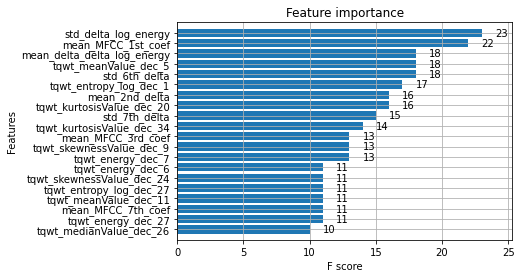

<Figure size 720x720 with 0 Axes>

In [ ]:
plot_importance(xgb_model, max_num_features=20, height=0.8)
plt.figure(figsize=(10, 10))
plt.show()

In [ ]:
'''
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(figsize=(10,10),kind='barh')
#plt.figure(figsize=)
'''

'\nfeature_important = xgb_model.get_booster().get_score(importance_type=\'weight\')\nkeys = list(feature_important.keys())\nvalues = list(feature_important.values())\n\ndata = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)\ndata.plot(figsize=(10,10),kind=\'barh\')\n#plt.figure(figsize=)\n'

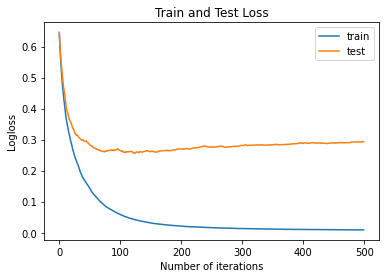

In [ ]:
results = xgb_model.evals_result()
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.title('Train and Test Loss')
plt.ylabel('Logloss')
plt.xlabel('Number of iterations')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true= testY,y_pred=predictionx))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        37
           1       0.92      0.97      0.95       115

    accuracy                           0.91       152
   macro avg       0.91      0.85      0.88       152
weighted avg       0.91      0.91      0.91       152



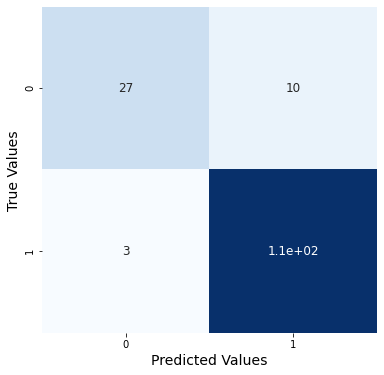

In [ ]:
cm2 = confusion_matrix(testY,y_pred)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm2, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Blues');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()


In [ ]:
'''Model 2'''
#RandomForestClassifier

clfRF=RandomForestClassifier(n_estimators=20,
                       criterion='gini',
                       max_depth=None,
                       min_weight_fraction_leaf=0.0,
                       max_features=10, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       bootstrap=True, oob_score=False,
                       n_jobs=5, random_state=None,
                       verbose=0, warm_start=False, class_weight=None, 
                       )

clfRF=clfRF.fit(trainX_clean,trainY)

y_predi = clfRF.predict(testX_clean)
predictionr = [round(value) for value in y_predi]

accuracy = accuracy_score(testY, predictionr)
print("Random Forest Classification: ")
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Random Forest Classification: 
Accuracy: 84.21%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true= testY,y_pred=predictionr))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        37
           1       0.84      0.98      0.90       115

    accuracy                           0.84       152
   macro avg       0.86      0.69      0.73       152
weighted avg       0.85      0.84      0.82       152



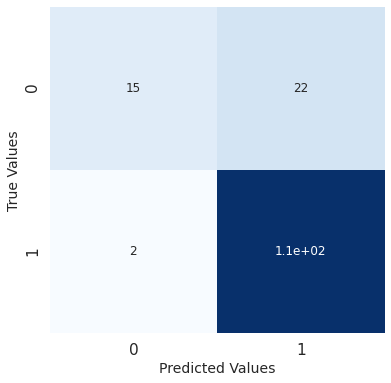

In [ ]:
cm3 = confusion_matrix(testY,y_predi)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm3, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Blues');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()


In [ ]:
classifier = SVC()
classifier.fit(trainX_clean,trainY)
y_predo = classifier.predict(testX_clean)
predictions = [round(value) for value in y_predo]
cm = confusion_matrix(testY,y_predo)
accuracy = accuracy_score(testY,y_predo)
print("Support Vector Machine:")


print('Accuracy Score: %.2f%%' % (accuracy_score(testY, y_predo) * 100.0))


Support Vector Machine:
Accuracy Score: 76.32%


In [ ]:
print(classification_report(y_true= testY,y_pred=predictions))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.76      1.00      0.86       115

    accuracy                           0.76       152
   macro avg       0.88      0.51      0.46       152
weighted avg       0.82      0.76      0.67       152



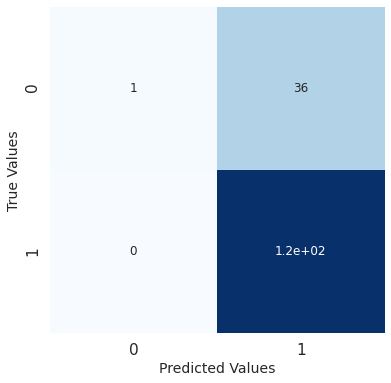

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Blues');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(trainX_clean,trainY)
y_pr = classifier.predict(testX_clean)
predictiond = [round(value) for value in y_pr]
print("Decision Tree Classifier :")


print('Accuracy Score: %.2f%%' % (accuracy_score(testY, y_pr) * 100.0))


Decision Tree Classifier :
Accuracy Score: 81.58%


In [ ]:
print(classification_report(y_true= testY,y_pred=predictiond))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        37
           1       0.88      0.88      0.88       115

    accuracy                           0.82       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.82      0.82      0.82       152



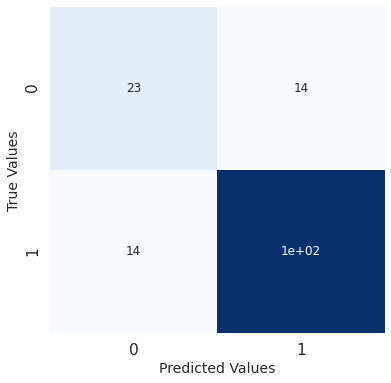

In [ ]:
cm4 = confusion_matrix(testY,y_pr)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.4) #for label size
sns.heatmap(cm4, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Blues');
ax1.set_ylabel('True Values',fontsize=14)
ax1.set_xlabel('Predicted Values',fontsize=14)
plt.show()